In [1]:
import sys
sys.path.append("..")
import numpy as np

In [ ]:
%pip install econometron

Note: you may need to restart the kernel to use updated packages.


In [3]:
!pip show econometron

Name: econometron
Version: 0.0.1
Summary: A Python package for solving ,simulating and estimating DSGE and VAR models.
Home-page: UNKNOWN
Author: Mohamed Amine Ouerfelli 
Author-email: mohamedamine.ouerfelli@outlook.com
License: MIT
Location: c:\users\asus\econometron
Editable project location: c:\users\asus\econometron
Requires: colorama, matplotlib, numpy, pandas, scipy, statsmodels, sympy
Required-by: 


In [ ]:
import econometron

In [ ]:
#in your case from econometron.Models import m

from econometron.Models import RE_model

## 🧠 New Keynesian Model — A Walkthrough

In this example, we work with a **linear New Keynesian model** to illustrate the core dynamics of output, inflation, and monetary policy.

---

### 📌 Model Structure

The model includes four main equations:

1. **Euler Equation** — models household intertemporal choices:

   $$
   x_t = x_{t+1} + \frac{1}{g}(r_t - \pi_{t+1}) = 0
   $$

   where $x_t$ is the output gap, $r_t$ is the nominal interest rate, and $\pi_{t+1}$ is expected inflation.

2. **New Keynesian Phillips Curve** — models inflation dynamics under sticky prices:

   $$
   \pi_t = \beta \pi_{t+1} - \kappa (x_t - \bar{x}_t) 
   $$

   where $\bar{x}_t$ is **potential output** and $x_t - \bar{x}_t$ represents the output gap relative to potential.

3. **Monetary Policy Rule (Taylor Rule)** — describes how the central bank adjusts the interest rate in response to inflation:

   $$
   r_t = \phi \pi_t 
   $$

4. **Potential Output Dynamics** — captures the stochastic evolution of potential output:

   $$
   \bar{x}_{t+1} = \rho \bar{x}_t + \sigma_x
   $$

---

### 📊 Variables

* $x_t$: Output
* $\pi_t$: Inflation
* $r_t$: Nominal interest rate
* $\bar{x}_t$: **Potential output**

---

### ⚙️ Parameters

* $g = 5$: Inverse of relative risk aversion
* $\beta = 0.99$: Discount factor
* $\kappa = 0.88$: Slope of Phillips curve
* $\rho = 0.95$: Persistence of potential output
* $\phi = 1.5$: Taylor rule coefficient
* $\sigma_x = 0.01$: Shock to potential output


In [5]:
# Model setup
equations = [
    "x_t - x_tp1 + (1/g) * (r_t - p_tp1) = 0",
    "p_t - beta * p_tp1 - kappa * (x_t - xbar_t) = 0",
    "- r_t + phi*p_t=0",
    "- xbar_tp1 + rho * xbar_t + sigmax = 0"
]

variables = ['x', 'p', 'r','xbar']
states = ['xbar']
exo_states=['xbar']
shock_names = ['sigmax']
# Parameters dictionary
parameters = {
    'g': 5,      # Inverse of relative risk aversion (1/g)
    'beta': 0.99,       # Discount factor
    'kappa': 0,
    'rho': 0.95,        # Persistence of output gap target
    'phi': 1.5,         # Taylor rule inflation coefficient
    'd': 0.5,          # Calvo parameter
    'sigmax':0.01
}

In [6]:
# Analytical steady state for initial guess
sigma_X, beta,g, rho, phi, d = parameters['sigmax'],parameters['beta'],parameters['g'],parameters['rho'],parameters['phi'],parameters['d']
parameters['kappa'] = ((1 - d) * (1 - d * beta)) / d
initial_guess = [1, 1, 1]

In [7]:
# Initialize and run model
NK = RE_model(
    equations=equations,
    variables=variables,
    exo_states=exo_states,
    shocks=shock_names,
    parameters=parameters,

)

In [8]:
NK.set_initial_guess(initial_guess)

In [9]:
NK.compute_ss(guess=initial_guess, method='fsolve', options={'xtol': 1e-10})

Steady-state residuals: [-0.   -0.   -0.   -0.01]


x        0.000000e+00
p       1.482197e-323
r       1.976263e-323
xbar     0.000000e+00
dtype: float64

In [10]:
NK.approximate()

(array([[0.  , 0.  , 0.99, 0.  ],
        [0.  , 0.  , 0.  , 0.  ],
        [1.  , 0.  , 0.  , 0.  ],
        [0.  , 1.  , 0.2 , 0.  ]]),
 array([[ 0.505, -0.505,  1.   ,  0.   ],
        [ 0.   ,  0.   ,  1.5  , -1.   ],
        [ 0.95 ,  0.   ,  0.   ,  0.   ],
        [ 0.   ,  1.   ,  0.   ,  0.2  ]]),
 array([[0.],
        [0.],
        [1.],
        [0.]]))

## Solving THe Model
**The Solution Method Here Is Klein(2000) solab.m**


In [11]:
NK.exo_states

['xbar']

In [12]:
NK.variables

['x', 'p', 'r', 'xbar']

In [13]:
NK.solve_RE_model()
print("Policy Function (f):\n", NK.f)
print("State Transition (p):\n", NK.p)


Policy Function (f):
 [[ 0.94916702]
 [-0.43143956]
 [-0.64715933]]
State Transition (p):
 [[0.95]]


c:\users\asus\econometron\Models\Linear_RE.py:732: RuntimeWarning: divide by zero encountered in divide
  eigenvals = np.abs(beta / alpha)
c:\users\asus\econometron\Models\Linear_RE.py:732: RuntimeWarning: invalid value encountered in divide
  eigenvals = np.abs(beta / alpha)


c:\users\asus\econometron\Models\Linear_RE.py:888: UserWarning: Steady state contains zeros so normalize set to False.
  self._compute_irfs(T=T, t0=1, shocks=None, center=True)


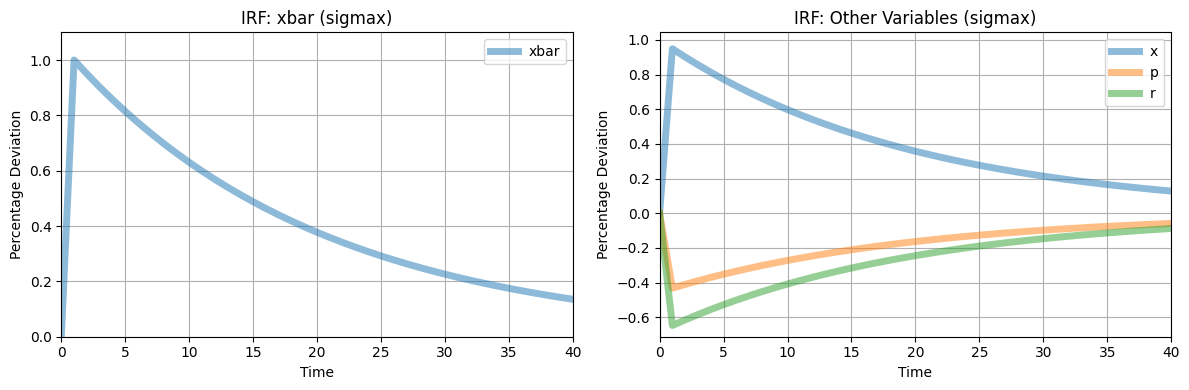

In [14]:
NK.plot_irfs()

In [15]:
NK.simulate(T=51, drop_first=10, covariance_matrix=np.array([[0.01**2]]))

C:\Users\ASUS\AppData\Local\Temp\ipykernel_11876\3049471006.py:1: UserWarning: Steady state contains zeros so normalize set to False.
  NK.simulate(T=51, drop_first=10, covariance_matrix=np.array([[0.01**2]]))


,sigmax_t,x_t,p_t,r_t,xbar_t
0,-0.009912,0.016730,0.015880,-0.007218,-0.010827
1,0.004310,0.020204,0.019177,-0.008717,-0.013075
2,0.016933,0.036127,0.034291,-0.015587,-0.023380
3,-0.000685,0.033636,0.031926,-0.014512,-0.021768
4,-0.004736,0.027218,0.025835,-0.011743,-0.017615
5,-0.008268,0.017589,0.016695,-0.007589,-0.011383
6,0.002599,0.019309,0.018327,-0.008330,-0.012496
7,-0.013832,0.004511,0.004282,-0.001946,-0.002919
8,0.008909,0.013195,0.012524,-0.005693,-0.008539
9,-0.021907,-0.009372,-0.008896,0.004044,0.006065


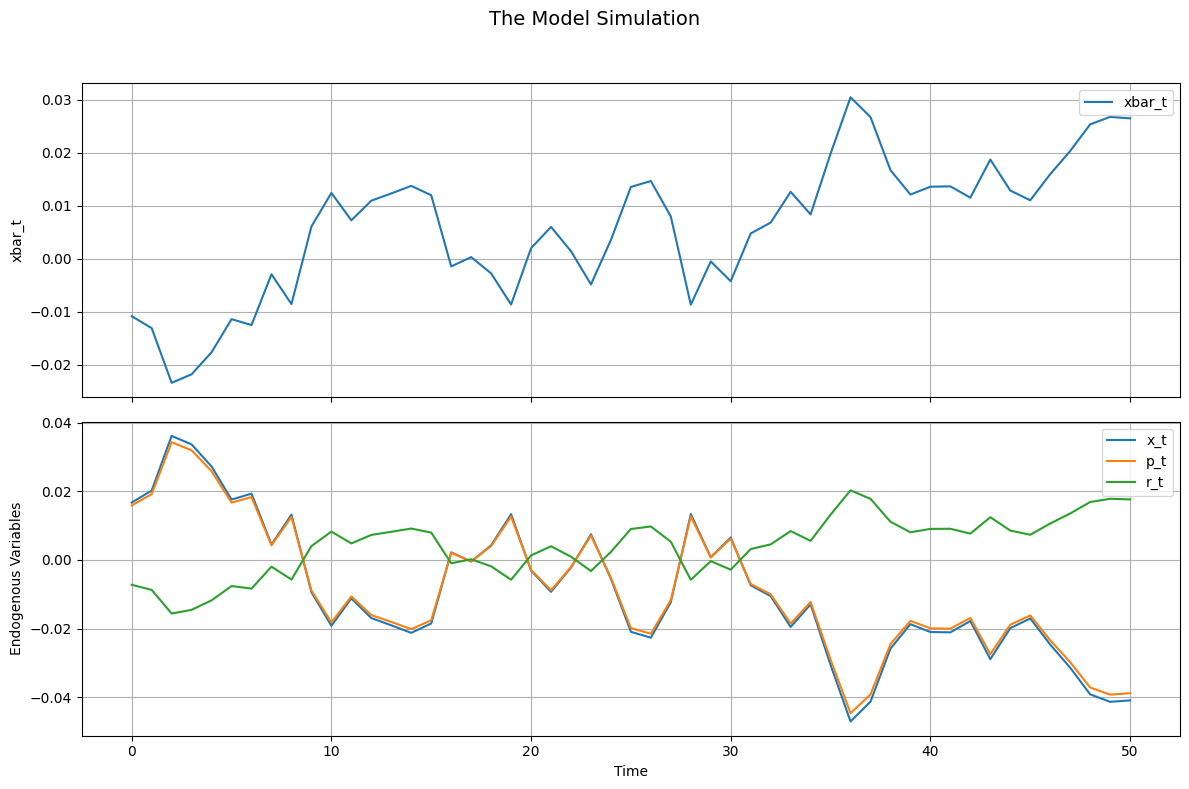

In [16]:
NK.simulations()

# Estimation of the Model


## 📈 Model Estimation Strategy

After solving the structural model, we aim to express it in a **state-space form** to enable estimation. This often requires **augmenting the model with additional stochastic shocks** to match the variability and dynamics observed in real-world data.

---

### 🧩 Why Add More Shocks?

Economic models—especially DSGEs—often understate the volatility seen in macroeconomic time series. By introducing **additional exogenous shocks** (e.g., preference, risk premium, measurement error), we:

* Improve the model’s empirical fit
* Allow for richer dynamic responses
* Enable accurate filtering and smoothing in estimation

---

## ⚙️ Estimation Techniques

We employ two complementary estimation strategies:

### 1. **Classical Maximum Likelihood Estimation (MLE)**

In this method, we treat the model as a **state-space system**:

$$
\begin{aligned}
x_{t+1} &= A x_t + B \varepsilon_t \quad &\text{(transition equation)} \\
y_t &= C x_t + D \eta_t \quad &\text{(measurement equation)}
\end{aligned}
$$

Here, $x_t$ are latent (unobserved) states, $y_t$ are observables, and $\varepsilon_t, \eta_t$ are shock terms. The parameters in matrices $A, B, C, D$ are functions of the model's structural parameters.

**The Kalman Filter** is used to:

* Estimate the unobserved states given observed data
* Compute the **likelihood** of the model
* Maximize this likelihood with respect to the parameters

---

### 🧮 What Is the Kalman Filter? (For Economists)

Think of the Kalman filter as a **recursive forecasting tool**. At every period, it:

1. **Predicts** the value of the unobserved economic variables (like expectations or technology)
2. **Updates** those predictions using observed data (like GDP, inflation)
3. **Minimizes the mean squared error** of the predictions

It is especially powerful for DSGE models because:

* It deals naturally with unobservable variables
* It handles measurement noise
* It works under linear-Gaussian assumptions (which linearized DSGEs satisfy)

---

### 2. **Bayesian Estimation**

Bayesian estimation allows us to **combine prior economic knowledge** with observed data.

Steps:

* Define **priors** for each structural parameter (e.g., Beta for bounded parameters, Normal for preferences, Inverse Gamma for variances)
* Use the **Kalman filter** to compute the likelihood
* Apply **Bayes’ rule** to obtain the posterior distribution:

$$
\text{Posterior} \propto \text{Likelihood} \times \text{Prior}
$$

* Use **MCMC algorithms** (e.g., Metropolis-Hastings) to sample from the posterior

---

### ✳️ Summary

| Method   | Needs Prior? | Output          | Strengths                         |
| -------- | ------------ | --------------- | --------------------------------- |
| MLE      | ❌ No         | Point estimates | Fast, interpretable               |
| Bayesian | ✅ Yes        | Distributions   | Incorporates uncertainty & theory |



**1-State Space Formulation**

In [ ]:
from econometron.utils import optimizers ,estimation ,state_space

In [ ]:
from econometron.utils.state_space import update_ss

In [ ]:
from econometron.utils.estimation.MLE import genetic_algorithm_kalman
from econometron.filters import kalman_objective

In [20]:
def derived_fn(p):
    p['kappa'] = ((1 - p['d']) * (1 - p['d'] * p['beta'])) / p['d']
#since we have kappa is written in function of Beta nd delta , the derived_fn here is param fixer , for parameter that are not intialized  
def R_builder(p):
  A1 = np.array([[1, -p['phi'], 0],
                    [0, 1, -p['kappa']],
                    [1/p['g'], 0, 1]])
  if abs(np.linalg.det(A1)) < 1e-6:
    raise ValueError("A1 matrix is singular")
  R1= np.array([[p['sigma_y'], 0, 0],
                [0, p['sigma_p'], 0],
                [0, 0, p['sigma_r']]])

  R=np.linalg.solve(A1,R1)

  return R

def C_builder(p):
    return np.array([[p['sigmax']]])

# Assuming you have this solver:
# def NK.solve(params): ...

# Define updater
base_params = {
    'g': 1.00000000e+01,
    'beta': 8.97384125e-01,
    'kappa': 0.8,
    'rho': 9.61923424e-01,
    'phi': 1,
    'd': 8.64607398e-01 ,
    'sigmax': 7.52359617e-03,
    'sigma_y': 0.01,
    'sigma_p': 0.01,
    'sigma_r': 0.01
}
# [1.00000000e+01 8.97384125e-01 9.61923424e-01 1.00000000e+00
#  8.64607398e-01 7.52359617e-03 7.20758075e-03 1.00000000e-06
#  9.97050476e-03]
update_state_space = update_ss.make_state_space_updater(
    base_params=base_params,
    solver=NK.solve_RE_model,
    build_R=R_builder,
    build_C=C_builder,
    derived_fn=derived_fn
)

In [21]:
parameters = {
    'g': 5,      # Inverse of relative risk aversion (1/g)
    'beta': 0.99,       # Discount factor
    'kappa': 0.8,
    'rho': 0.95,        # Persistence of output gap target
    'phi': 1.5,         # Taylor rule inflation coefficient
    'd': 0.5,          # Calvo parameter
    'sigmax': 0.01,
    'sigma_y': 0.01,
    'sigma_p': 0.01,
    'sigma_r': 0.01
}

# Example usage:
updated = update_state_space(base_params)
print(updated)

{'A': array([[0.96192342]]), 'D': array([[ 0.0250153 ],
       [-0.25015301],
       [-0.25015301]]), 'Q': array([[5.66044993e-05]]), 'R': array([[ 1.98725857e-04,  9.90755809e-05, -1.63753451e-05],
       [ 9.90755809e-05,  9.94253049e-05, -6.41031751e-06],
       [-1.63753451e-05, -6.41031751e-06,  1.01287810e-04]])}


c:\users\asus\econometron\Models\Linear_RE.py:732: RuntimeWarning: divide by zero encountered in divide
  eigenvals = np.abs(beta / alpha)
c:\users\asus\econometron\Models\Linear_RE.py:732: RuntimeWarning: invalid value encountered in divide
  eigenvals = np.abs(beta / alpha)


**2-Estimation MLE**

In [22]:
import scipy.io as sio
mat = sio.loadmat('../Z.mat')
y=mat['Z']

`Y` , is the data i t contains Output , Inflation , Nominal Interest Rate

In [23]:
data=y[::-1,:]

In [24]:
param_names = [k for k in parameters.keys() if k != 'kappa']
initial_params = [parameters[name] for name in param_names]

# Fixed parameters (empty since all except kappa are optimized)
fixed_params = {}
LB= [1e-10, 1e-10, 1e-10, 1, 1e-10, 1e-10, 1e-10, 1e-10, 1e-10]
UB= [10, 1, 0.99, 5, 1, 1, 1, 1, 1]

In [25]:
initial_params

[5, 0.99, 0.95, 1.5, 0.5, 0.01, 0.01, 0.01, 0.01]

In [26]:
ga_result = genetic_algorithm_kalman(y, initial_params , LB, UB, param_names, fixed_params, update_state_space,seed=1)

Generation 0: Best fitness = -1323.582909213672, Mean fitness = 64359393.315062426, Near-zero params = 0
{'x': array([5.  , 0.99, 0.95, 1.5 , 0.5 , 0.01, 0.01, 0.01, 0.01]), 'fun': -1323.582909213672, 'nfev': 95, 'message': 'Genetic Algorithm iteration.'}
Error in kalman_objective:
Params: [6.97729763 1.         0.99       1.         0.62543411 0.01304786
 0.01020124 0.0294118  0.01017816]
Exception: Invertibility condition violated: z11 is singular
Error in kalman_objective:
Params: [7.35812705 0.99961631 0.9378011  1.         0.49997628 0.01912732
 0.00943414 0.00787192 0.00853676]
Exception: Invertibility condition violated: z11 is singular
Error in kalman_objective:
Params: [4.52651904 1.         0.969046   1.         0.53033419 0.01356315
 0.01229343 0.01433543 0.00917979]
Exception: Invertibility condition violated: z11 is singular
Error in kalman_objective:
Params: [4.94462868 0.95782841 0.94573102 1.         0.49827695 0.00872707
 0.01050987 0.01447445 0.00997696]
Exception: In

In [28]:
ga_result

{'result': {'x': array([9.99789584e+00, 8.98368805e-01, 9.45207359e-01, 1.00000168e+00,
         8.74140344e-01, 9.19034098e-03, 7.77681663e-03, 6.34076193e-05,
         1.12303051e-02]),
  'fun': -1560.8301909500246,
  'nfev': 4550,
  'message': 'Genetic Algorithm completed successfully.'},
 'table':   Parameter  Estimate     Std Error   P-Value  Log-Likelihood  \
 0         g  9.997896  3.213427e+00  0.001863     1560.830191   
 1      beta  0.898369  8.360568e-02  0.000000     1560.830191   
 2       rho  0.945207  3.458765e-02  0.000000     1560.830191   
 3       phi  1.000002  7.071068e-20  0.000000     1560.830191   
 4         d  0.874140  3.010660e-02  0.000000     1560.830191   
 5    sigmax  0.009190  3.162576e-03  0.003661     1560.830191   
 6   sigma_y  0.007777  6.802445e-04  0.000000     1560.830191   
 7   sigma_p  0.000063  2.731698e-04  0.816446     1560.830191   
 8   sigma_r  0.011230  6.958438e-04  0.000000     1560.830191   
 
               Method  
 0  Genetic 

In [32]:
!jupyter nbconvert --to markdown Test_NK.ipynb

usage: jupyter [-h] [--version] [--config-dir] [--data-dir] [--runtime-dir]
               [--paths] [--json] [--debug]
               [subcommand]

Jupyter: Interactive Computing

positional arguments:
  subcommand     the subcommand to launch

options:
  -h, --help     show this help message and exit
  --version      show the versions of core jupyter packages and exit
  --config-dir   show Jupyter config dir
  --data-dir     show Jupyter data dir
  --runtime-dir  show Jupyter runtime dir
  --paths        show all Jupyter paths. Add --json for machine-readable
                 format.
  --json         output paths as machine-readable json
  --debug        output debug information about paths

Available subcommands: kernel kernelspec migrate run troubleshoot

Jupyter command `jupyter-nbconvert` not found.
